<a href="https://colab.research.google.com/github/Hadiqapieas/Leukemia-Data-classification/blob/ResNet18/ResNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [7]:
!unzip Original.zip

Archive:  Original.zip
   creating: Pro/
  inflating: Pro/WBC-Malignant-Pro-001.jpg  
  inflating: Pro/WBC-Malignant-Pro-002.jpg  
  inflating: Pro/WBC-Malignant-Pro-003.jpg  
  inflating: Pro/WBC-Malignant-Pro-004.jpg  
  inflating: Pro/WBC-Malignant-Pro-005.jpg  
  inflating: Pro/WBC-Malignant-Pro-006.jpg  
  inflating: Pro/WBC-Malignant-Pro-007.jpg  
  inflating: Pro/WBC-Malignant-Pro-008.jpg  
  inflating: Pro/WBC-Malignant-Pro-009.jpg  
  inflating: Pro/WBC-Malignant-Pro-010.jpg  
  inflating: Pro/WBC-Malignant-Pro-011.jpg  
  inflating: Pro/WBC-Malignant-Pro-012.jpg  
  inflating: Pro/WBC-Malignant-Pro-013.jpg  
  inflating: Pro/WBC-Malignant-Pro-014.jpg  
  inflating: Pro/WBC-Malignant-Pro-015.jpg  
  inflating: Pro/WBC-Malignant-Pro-016.jpg  
  inflating: Pro/WBC-Malignant-Pro-017.jpg  
  inflating: Pro/WBC-Malignant-Pro-018.jpg  
  inflating: Pro/WBC-Malignant-Pro-019.jpg  
  inflating: Pro/WBC-Malignant-Pro-020.jpg  
  inflating: Pro/WBC-Malignant-Pro-021.jpg  
  inflating: P

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
#Organizing Images into Benign and Malignant Folders
# Defining paths to dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Moving images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory

In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your dataset directories
dataset_dir = '/content'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Create the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Define paths for stages that need to be moved to Malignant
stages = ['Early', 'Pre', 'Pro']

# Move images from early, pre, and pro directories to malignant directory
for stage in stages:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
    else:
        print(f"Directory {stage_dir} does not exist.")
        # List contents of the 'content' directory
!ls /content

# List files in Benign and Malignant directories
!ls /content/Benign
!ls /Original/Malignant

# Define paths for new dataset splits
train_dir = '/content/train_dataset'
val_dir = '/content/validation_dataset'
test_dir = '/content/test_dataset'

# Create directories for dataset splits
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split dataset and copy images
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    if os.path.exists(category_dir):  # Ensure directory exists
        image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
        train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
        val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, category))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, category))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, category))
    else:
      print(f"Directory {category_dir} does not exist.")


Benign	   Original	 sample_data   train_dataset
Malignant  Original.zip  test_dataset  validation_dataset
WBC-Benign-001.jpg  WBC-Benign-102.jpg	WBC-Benign-203.jpg  WBC-Benign-304.jpg	WBC-Benign-405.jpg
WBC-Benign-002.jpg  WBC-Benign-103.jpg	WBC-Benign-204.jpg  WBC-Benign-305.jpg	WBC-Benign-406.jpg
WBC-Benign-003.jpg  WBC-Benign-104.jpg	WBC-Benign-205.jpg  WBC-Benign-306.jpg	WBC-Benign-407.jpg
WBC-Benign-004.jpg  WBC-Benign-105.jpg	WBC-Benign-206.jpg  WBC-Benign-307.jpg	WBC-Benign-408.jpg
WBC-Benign-005.jpg  WBC-Benign-106.jpg	WBC-Benign-207.jpg  WBC-Benign-308.jpg	WBC-Benign-409.jpg
WBC-Benign-006.jpg  WBC-Benign-107.jpg	WBC-Benign-208.jpg  WBC-Benign-309.jpg	WBC-Benign-410.jpg
WBC-Benign-007.jpg  WBC-Benign-108.jpg	WBC-Benign-209.jpg  WBC-Benign-310.jpg	WBC-Benign-411.jpg
WBC-Benign-008.jpg  WBC-Benign-109.jpg	WBC-Benign-210.jpg  WBC-Benign-311.jpg	WBC-Benign-412.jpg
WBC-Benign-009.jpg  WBC-Benign-110.jpg	WBC-Benign-211.jpg  WBC-Benign-312.jpg	WBC-Benign-413.jpg
WBC-Benign-010.jpg  W

In [11]:
# Defining transformations for the dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Creating datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [12]:
# Load the pre-trained ResNet-18 model
model = torchvision.models.resnet18(pretrained=True)

# Freeze parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False
# Modify the final fully connected layer for binary classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Binary classification with 2 output units

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 99.8MB/s]


In [13]:
#compiling model
# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 0/24
----------
Train Loss: 0.2575 Acc: 0.9030 Precision: 0.9121 Recall: 0.7000 F1: 0.7548
Val Loss: 0.1359 Acc: 0.9611 Precision: 0.9574 Recall: 0.8911 F1: 0.9203
Epoch 1/24
----------
Train Loss: 0.1127 Acc: 0.9675 Precision: 0.9632 Recall: 0.9100 F1: 0.9341
Val Loss: 0.0966 Acc: 0.9673 Precision: 0.9377 Recall: 0.9377 F1: 0.9377
Epoch 2/24
----------
Train Loss: 0.0838 Acc: 0.9741 Precision: 0.9621 Recall: 0.9371 F1: 0.9491
Val Loss: 0.0717 Acc: 0.9755 Precision: 0.9490 Recall: 0.9586 F1: 0.9538
Epoch 3/24
----------
Train Loss: 0.0710 Acc: 0.9820 Precision: 0.9702 Recall: 0.9603 F1: 0.9652
Val Loss: 0.0609 Acc: 0.9796 Precision: 0.9611 Recall: 0.9611 F1: 0.9611
Epoch 4/24
----------
Train Loss: 0.0560 Acc: 0.9855 Precision: 0.9749 Recall: 0.9694 F1: 0.9721
Val Loss: 0.0523 Acc: 0.9775 Precision: 0.9594 Recall: 0.9545 F1: 0.9569
Epoch 5/24
----------
Train Loss: 0.0565 Acc: 0.9824 Precision: 0.9749 Recall: 0.9571 F1: 0.9658
Val Loss: 0.0505 Acc: 0.9836 Precision: 0.9643 Recall

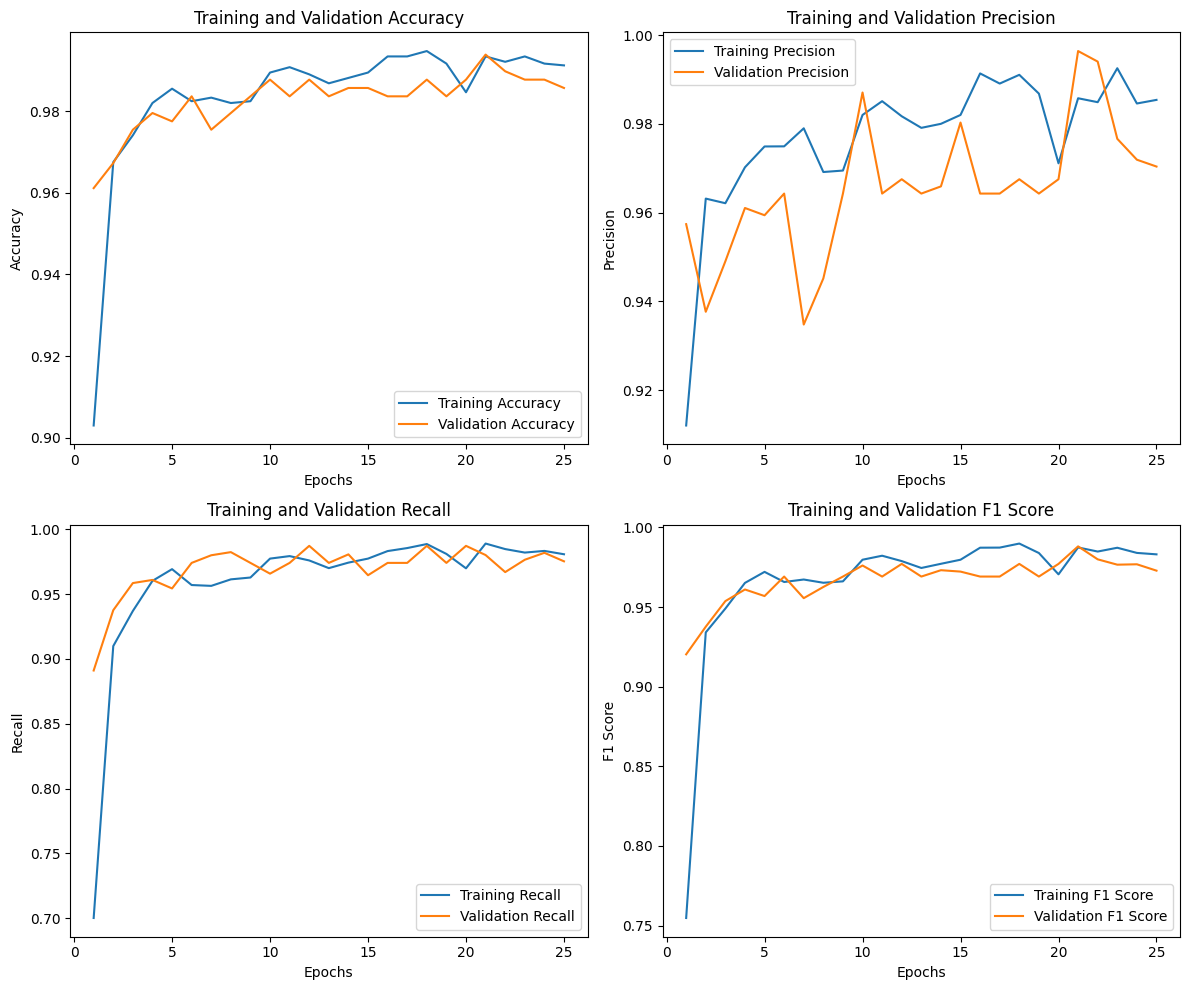

In [14]:
# Training function
import copy

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    val_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0
            all_labels = []
            all_preds = []

            for inputs, labels in dataloader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)
            precision = precision_score(all_labels, all_preds, average='macro')
            recall = recall_score(all_labels, all_preds, average='macro')
            f1 = f1_score(all_labels, all_preds, average='macro')

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} Precision: {precision:.4f} Recall: {recall:.4f} F1: {f1:.4f}')

            if phase == 'train':
                train_metrics['accuracy'].append(epoch_acc)
                train_metrics['precision'].append(precision)
                train_metrics['recall'].append(recall)
                train_metrics['f1'].append(f1)
            else:
                val_metrics['accuracy'].append(epoch_acc)
                val_metrics['precision'].append(precision)
                val_metrics['recall'].append(recall)
                val_metrics['f1'].append(f1)

                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)
    return model, train_metrics, val_metrics

# Training the model
model, train_metrics, val_metrics = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25)

# Plotting the metrics
def plot_metrics(train_metrics, val_metrics):
    epochs = range(1, len(train_metrics['accuracy']) + 1)
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, train_metrics['accuracy'], label='Training Accuracy')
    plt.plot(epochs, val_metrics['accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, train_metrics['precision'], label='Training Precision')
    plt.plot(epochs, val_metrics['precision'], label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, train_metrics['recall'], label='Training Recall')
    plt.plot(epochs, val_metrics['recall'], label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, train_metrics['f1'], label='Training F1 Score')
    plt.plot(epochs, val_metrics['f1'], label='Validation F1 Score')
    plt.title('Training and Validation F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot metrics
plot_metrics(train_metrics, val_metrics)


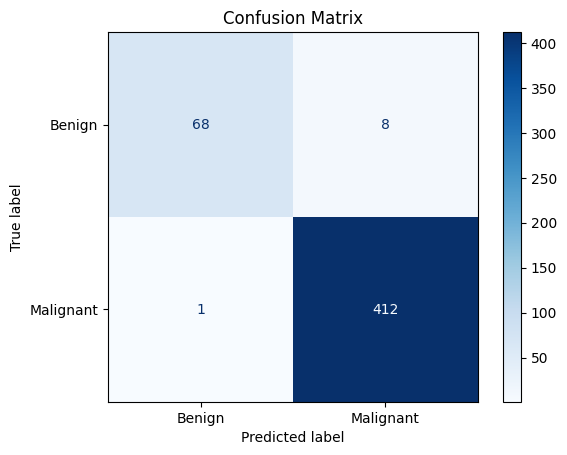

Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      0.89      0.94        76
   Malignant       0.98      1.00      0.99       413

    accuracy                           0.98       489
   macro avg       0.98      0.95      0.96       489
weighted avg       0.98      0.98      0.98       489

Test Loss: 0.0423
Test Accuracy: 0.9816
Test Precision: 0.9832
Test Recall: 0.9462
Test F1 Score: 0.9636


In [16]:

# Function to evaluate the model and print detailed metrics
def evaluate_model_with_detailed_metrics(model, dataloader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    test_loss /= len(dataloader.dataset)
    accuracy = correct / total

    # Calculate precision, recall, and f1-score
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataloader.dataset.classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    class_report = classification_report(all_labels, all_preds, target_names=dataloader.dataset.classes)
    print("Classification Report:\n", class_report)

    return test_loss, accuracy, precision, recall, f1, cm, class_report

# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall, test_f1, cm, class_report = evaluate_model_with_detailed_metrics(model, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
